## Multiple Variable Linear Regression
#### Extending previous univeriate linear reg model to multiple regression model. 
- Extend data structure support to support multiple features
- Redo prediction, gradient and cost comput routines
- Vectorize operations using dot product function in numpy

In [282]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2) #reduce display precision

## Traning data
3 Examples, Four features


In [2]:
x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852,  2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
# data is stored in numpy array/matrix
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## Parameter Vector
- W is a vector with n elements
- b is Scalar

In [4]:
# Initial value to start with of w and b
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083

## Model Prediction With Multiple Variables
- 𝑓𝐰,𝑏(𝐱)=𝑤0𝑥0+𝑤1𝑥1+...+𝑤𝑛−1𝑥𝑛−1+𝑏
- 𝑓𝐰,𝑏(𝐱)=𝐰⋅𝐱+𝑏

In [5]:
#Loop version to calculate Prediction
def predict_single_loop(x, w, b):
    m = x.shape[0]
    p = 0
    for i in range(m):
        p = p + w[i]*x[i]
    p = p + b
    return p

In [6]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [7]:
#Vectorized Implementation
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p   

In [8]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


## Compute Cost With Multiple Variables
𝐽(𝐰,𝑏)=12𝑚∑𝑖=0𝑚−1(𝑓𝐰,𝑏(𝐱(𝑖))−𝑦(𝑖))2

In [9]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    err = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        err = err + (f_wb_i - y[i])**2
    cost = err * 1/(2*m)
    return cost

In [10]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


### Compute Gradient Descent with multiple variables

- Have to change w1, w2, w3, w(n-1) and b ... till the congergence.
- w1 = w1 - alpha*ddJ(w,b)/dw1
- w2 = w2 - alpha*dJ(w,b)/dw2
- w(n-1) = w(n-1) - alpha*dJ(w,b)/dw(n-1)

-dJ(w,b)/dwj = 1/m * i=1 to i = m ∑ (f(w,b)(x[i]) - y[i]) xi,j

-dJ(w,b)/dwb = 1/m * i=1 to i = m ∑ (f(w,b)(x[i]) - y[i])

In [242]:
def compute_gradient(x, y, w, b): 
    
    m = x.shape[0]  #total traning examples
    n = x.shape[1]  #total features
    
    djdw = np.zeros((n,))
    djdb = 0
    err_sum = 0
    for j in range(n):
        for i in range(m):
            fwb = np.dot(x[i], w) + b
            err = fwb - y[i]
            err_sum = err_sum + (err * x[i][j])
        djdw[j] = err_sum / m
        err_sum = 0
   
   
    for i in range(m):
        fwb = np.dot(x[i], w) + b
        err = fwb - y[i]
        err_sum = err_sum + err
        djdb = err_sum / m
    
    return djdb, djdw
    # for i in range(3):
    #     err = err + ((np.dot(x[i],w) + b) - y[i])  * x[i][0]
    # djw1 = err  / 3
    # return djw1
    
#     err = 0
#     for i in range(3):
#         err = err + ((np.dot(x[i],w) + b) - y[i])  * x[i][1]
#     djw2 = err  / 3
    
#     err = 0
#     for i in range(3):
#         err = err + ((np.dot(x[i],w) + b) - y[i])  * x[i][2]
#     djw3 = err  / 3
    
#     err = 0
#     for i in range(3):
#         err = err + ((np.dot(x[i],w) + b) - y[i])  * x[i][3]
#     djw4 = err  / 3
    
#     djw = np.zeros(4)
#     djw[0] = djw1
#     djw[1] = djw2
#     djw[2] = djw3
#     djw[3] = djw4
      
    
#     return djw
      
    

        


In [246]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')


dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


## Implement Gradient Descent
i.e updating w vector and b until the convergence

In [279]:
def gradient_descent(x, y, init_w, init_b, alpha, cost_function, compute_gradinent, iterations):
    
    costs = []
    w = init_w
    b = init_b
    
    j = 0
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if j == 1000000:
            print(cost_function(x, y, w, b))
            j = 0
        j = j + 1
    return w, b, costs 
    
    
    

In [280]:
w_in = np.zeros(x_train.shape[1])
b_in = 0
alpha = 7.1e-7
iterations = 10000000
w, b, costs = gradient_descent(x_train, y_train, w_in, b_in, alpha, compute_cost, compute_gradient, iterations)
print("w = ", w)
print("b = ", b)
print(cost)

411.96983457766873
294.27257442913896
210.20070110213135
150.14764739642897
107.25138356092974
76.61031974323787
54.723220310031245
39.089131218044656
27.9216056863024
w =  [  0.17  19.11 -53.49   1.18]
b =  0.9989640575109019
1.5578904428966628e-12


(0,)
(0,)


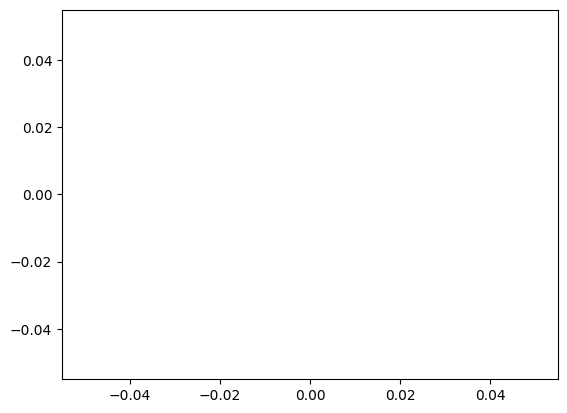

In [312]:
# plot cost versus iteration  
steps = np.zeros(0)
k = 0
for i in range(len(costs)):
    steps[i] = k
    k = k + 1
    
arr = np.array(costs)
print(np.shape(arr))
print(np.shape(steps))
ptl.plot(steps, costs, c='b',label='Our Prediction')

plt.show()